In [ ]:
!pip install rdflib

In [39]:
from rdflib import Graph, Namespace, RDF, RDFS, XSD
import networkx as nx
import matplotlib.pyplot as plt

## Start to define the TBox

In [50]:
g = Graph()
pub = Namespace("http://www.example.org/publication#")
g.bind("pub", pub)

Here we will define the class and the subclass of the schema

In [51]:
# Class
g.add((pub.Scientist, RDF.type, RDFS.Class))
g.add((pub.Publication, RDF.type, RDFS.Class))
g.add((pub.Review, RDF.type, RDFS.Class))
g.add((pub.Topic, RDF.type, RDFS.Class))
g.add((pub.Event, RDF.type, RDFS.Class))
#Subclass
g.add((pub.RevelantAuthors, RDF.type, RDFS.Class))
g.add((pub.RevelantAuthors, RDFS.subClassOf, pub.Authors))

g.add((pub.Authors, RDF.type, RDFS.Class))
g.add((pub.Authors, RDFS.subClassOf, pub.Scientist))

g.add((pub.Reviewer, RDF.type, RDFS.Class))
g.add((pub.Reviewer, RDFS.subClassOf, pub.RevelantAuthors))

g.add((pub.JournalEditor, RDF.type, RDFS.Class))
g.add((pub.JournalEditor, RDFS.subClassOf, pub.Scientist))

g.add((pub.Conference, RDF.type, RDFS.Class))
g.add((pub.Conference, RDFS.subClassOf, pub.Event))

g.add((pub.Workshop, RDF.type, RDFS.Class))
g.add((pub.Workshop, RDFS.subClassOf, pub.Event))

g.add((pub.Conferencechair, RDF.type, RDFS.Class))
g.add((pub.Conferencechair, RDFS.subClassOf, pub.Scientist))


<Graph identifier=Nedfde28ed46a483f945ad18e5c99b4d5 (<class 'rdflib.graph.Graph'>)>

In [52]:
#Scientist
g.add((pub.writes, RDF.type, RDF.Property))
g.add((pub.writes, RDFS.domain, pub.Authors))
g.add((pub.writes, RDFS.range, pub.Publication))
g.add((pub.reviews, RDF.type, RDF.Property))
g.add((pub.reviews, RDFS.domain, pub.Reviewer))
g.add((pub.reviews, RDFS.range, pub.Publication))
g.add((pub.name, RDF.type, RDF.Property))
g.add((pub.name, RDFS.domain, pub.Scientist))
g.add((pub.name, RDFS.range, XSD.string))

#Publication
g.add((pub.cites, RDF.type, RDF.Property))
g.add((pub.cites, RDFS.domain, pub.Publication))
g.add((pub.cites, RDFS.range, pub.Publication))
g.add((pub.discuss, RDF.type, RDF.Property))
g.add((pub.discuss, RDFS.domain, pub.Publication))
g.add((pub.discuss, RDFS.range, pub.Topic))
g.add((pub.title, RDF.type, RDF.Property))
g.add((pub.title, RDFS.domain, pub.Publication))
g.add((pub.title, RDFS.range, XSD.string))
g.add((pub.abstract, RDF.type, RDF.Property))
g.add((pub.abstract, RDFS.domain, pub.Publication))
g.add((pub.abstract, RDFS.range, XSD.string))


g.add((pub.containsEvent, RDF.type, RDF.Property))
g.add((pub.containsEvent, RDFS.domain, pub.Event))
g.add((pub.containsEvent, RDFS.range, pub.Publication))

g.add((pub.year, RDF.type, RDF.Property))
g.add((pub.year, RDFS.domain, pub.Event))
g.add((pub.year, RDFS.range, XSD.string))

g.add((pub.proceedingID, RDF.type, RDF.Property))
g.add((pub.proceedingID, RDFS.domain, pub.Event))
g.add((pub.proceedingID, RDFS.range, XSD.string))

g.add((pub.city, RDF.type, RDF.Property))
g.add((pub.city, RDFS.domain, pub.Event))
g.add((pub.city, RDFS.range, XSD.string))

#Journals
g.add((pub.containsJournal, RDF.type, RDF.Property))
g.add((pub.containsJournal, RDFS.domain, pub.Journal))
g.add((pub.containsJournal, RDFS.range, pub.Publication))

g.add((pub.volume, RDF.type, RDF.Property))
g.add((pub.volume, RDFS.domain, pub.Journal))
g.add((pub.volume, RDFS.range, XSD.string))

g.add((pub.yearJournal, RDF.type, RDF.Property))
g.add((pub.yearJournal, RDFS.domain, pub.Journal))
g.add((pub.yearJournal, RDFS.range, XSD.string))

g.add((pub.assignReviewersCCH, RDF.type, RDF.Property))
g.add((pub.assignReviewersCCH, RDFS.domain, pub.Conferencechair))
g.add((pub.assignReviewersCCH, RDFS.range, pub.Reviewer))

g.add((pub.assignReviewersJE, RDF.type, RDF.Property))
g.add((pub.assignReviewersJE, RDFS.domain, pub.JournalEditor))
g.add((pub.assignReviewersJE, RDFS.range, pub.Reviewer))

g.add((pub.editionAssignedCCH, RDF.type, RDF.Property))
g.add((pub.editionAssignedCCH, RDFS.domain, pub.JournalEditor))
g.add((pub.editionAssignedCCH, RDFS.range, pub.Journal))

g.add((pub.editionAssignedJE, RDF.type, RDF.Property))
g.add((pub.editionAssignedJE, RDFS.domain, pub.Conferencechair))
g.add((pub.editionAssignedJE, RDFS.range, pub.Event))

<Graph identifier=Nedfde28ed46a483f945ad18e5c99b4d5 (<class 'rdflib.graph.Graph'>)>

## Save in the file rdfs

In [53]:
g.serialize("tbox_lab.ttl", format="turtle")

<Graph identifier=Nedfde28ed46a483f945ad18e5c99b4d5 (<class 'rdflib.graph.Graph'>)>

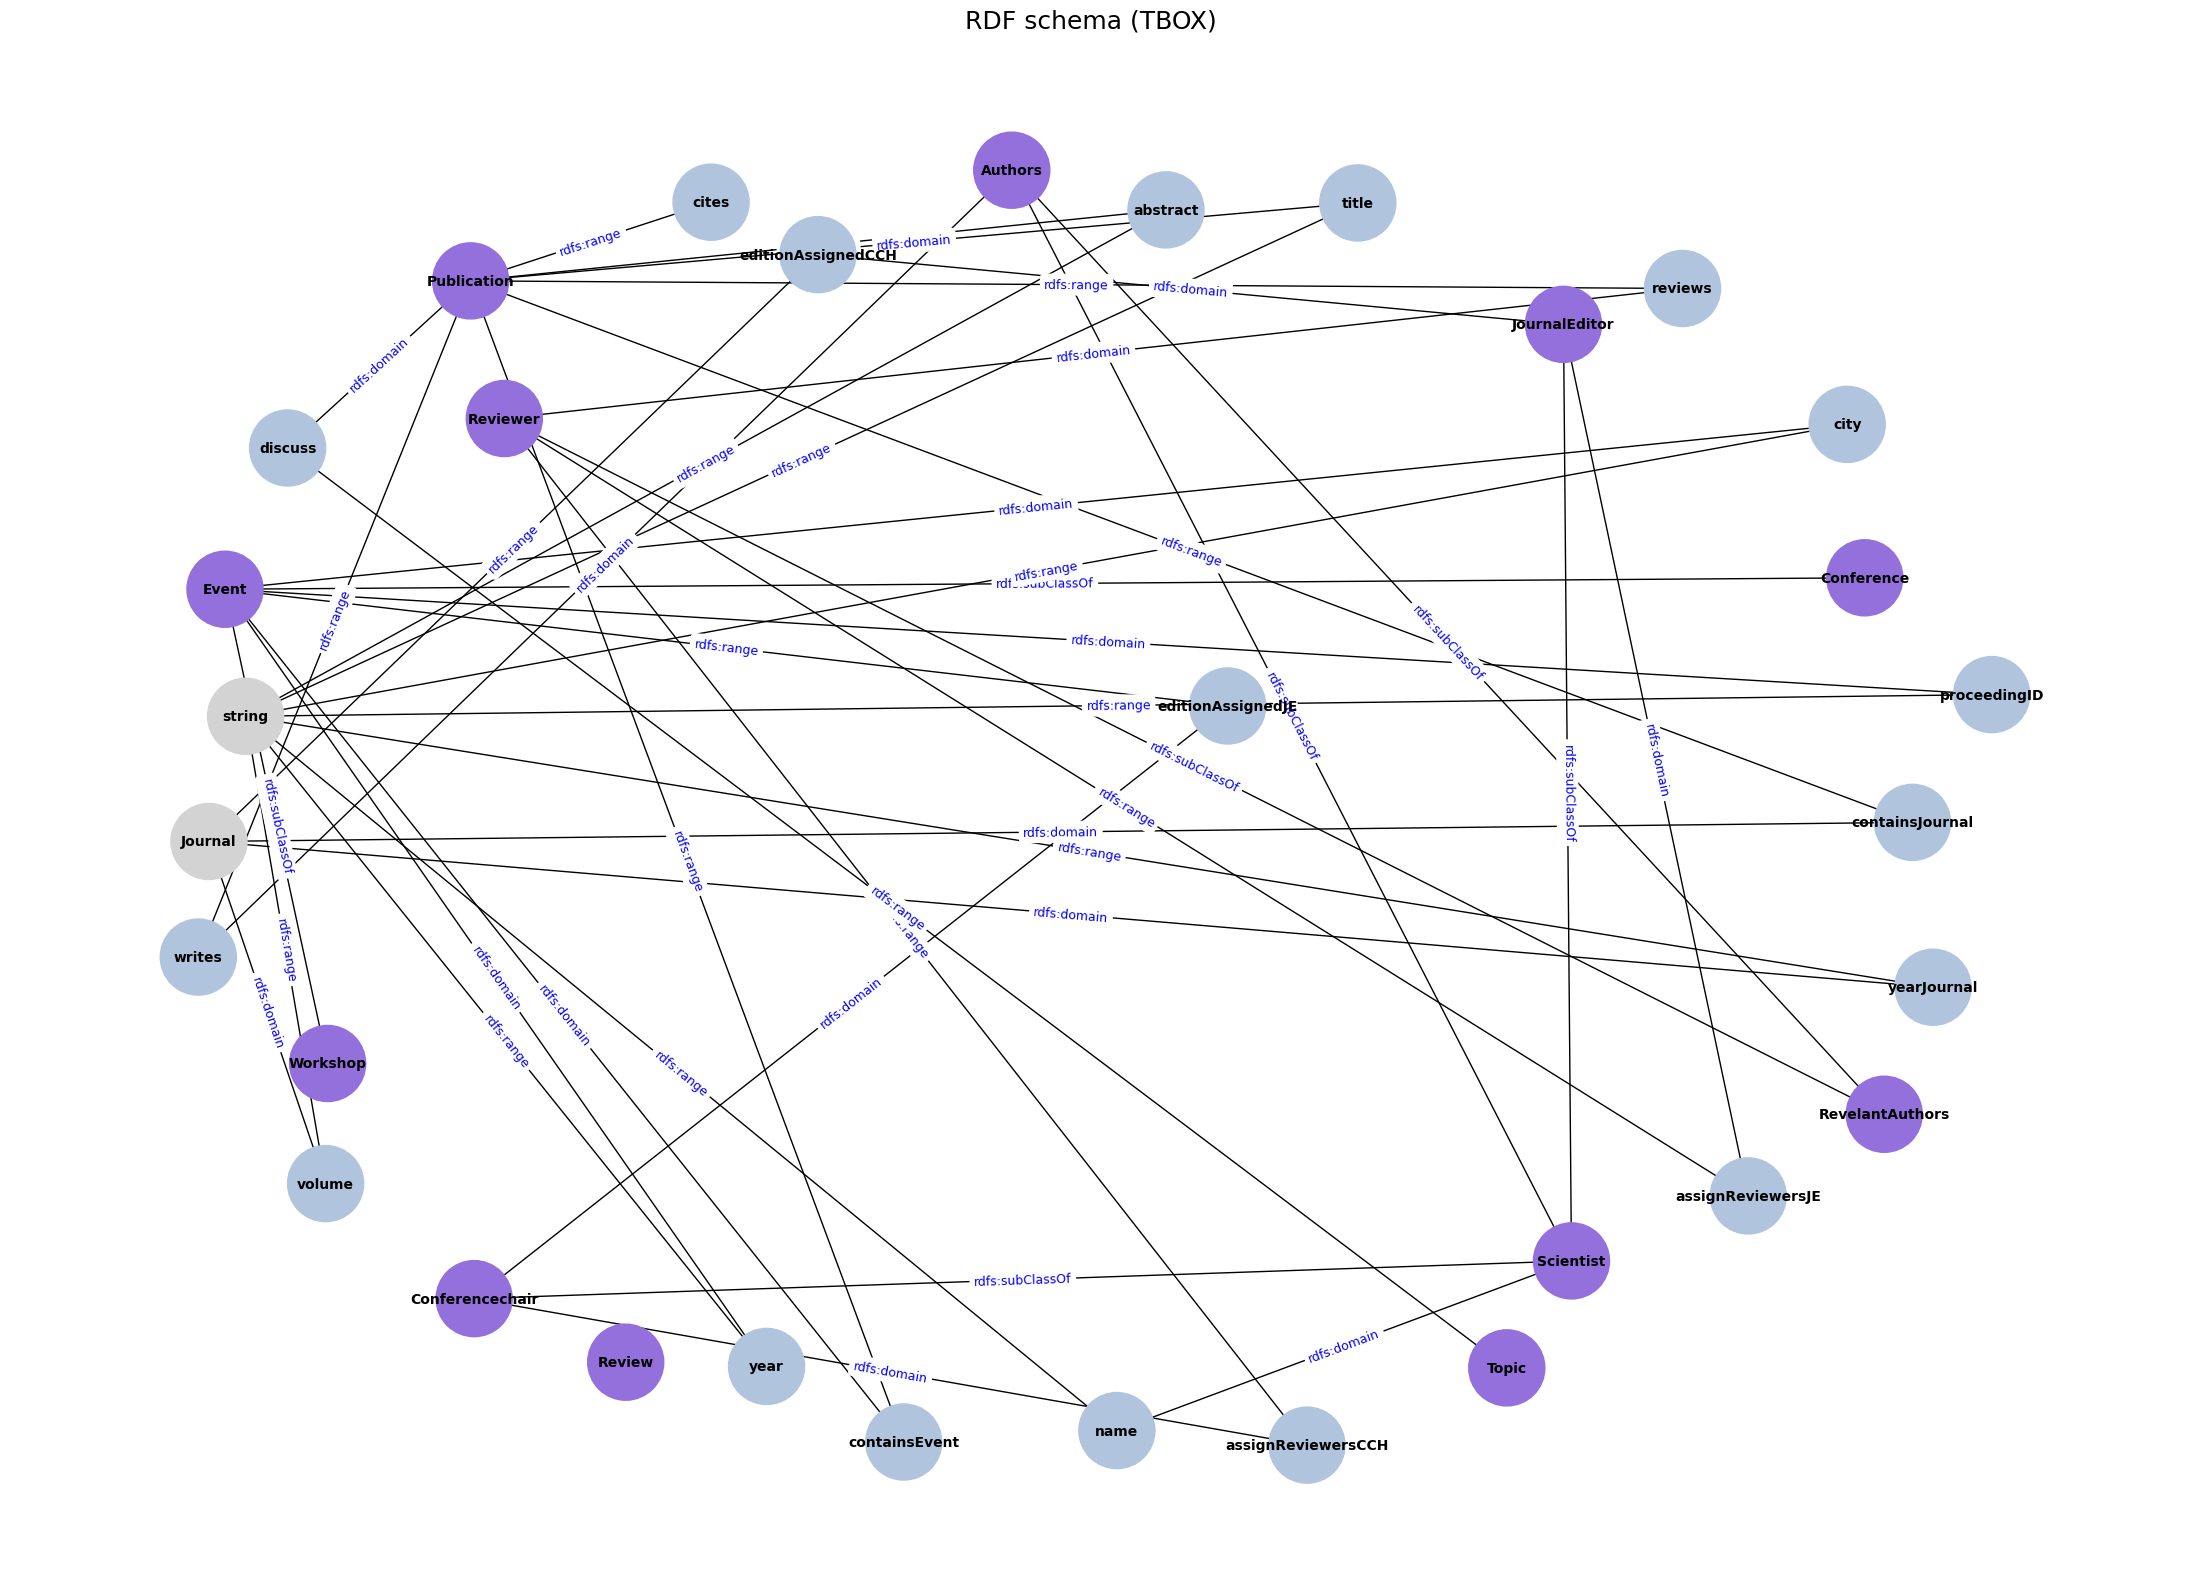

In [54]:
from rdflib import Graph, RDF, RDFS
import matplotlib.pyplot as plt
import networkx as nx

g = Graph()
g.parse("tbox_lab.ttl", format="turtle")

G = nx.DiGraph()

for s, _, _ in g.triples((None, RDF.type, RDFS.Class)):
    label = str(s).split("#")[-1]
    G.add_node(label, layer="Class", color="mediumpurple")

for s, _, _ in g.triples((None, RDF.type, RDF.Property)):
    domain = g.value(s, RDFS.domain)
    range_ = g.value(s, RDFS.range)
    if domain and range_:
        prop = str(s).split("#")[-1]
        domain_label = str(domain).split("#")[-1]
        range_label = str(range_).split("#")[-1]
        G.add_node(prop, layer="Property", color="lightsteelblue")
        G.add_edge(prop, domain_label, label="rdfs:domain")
        G.add_edge(prop, range_label, label="rdfs:range")

for subclass, _, superclass in g.triples((None, RDFS.subClassOf, None)):
    sub_label = str(subclass).split("#")[-1]
    super_label = str(superclass).split("#")[-1]
    G.add_node(sub_label, layer="Class", color="mediumpurple")
    G.add_node(super_label, layer="Class", color="mediumpurple")
    G.add_edge(sub_label, super_label, label="rdfs:subClassOf")

pos = nx.spring_layout(G, seed=42, k=2.5)
edge_labels = nx.get_edge_attributes(G, 'label')
node_colors = [G.nodes[n].get('color', 'lightgray') for n in G.nodes]

plt.figure(figsize=(22, 16))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=9)

plt.title("RDF schema (TBOX) ", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

